C:\Users\naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7716 - loss: 0.6270 - val_accuracy: 0.8549 - val_loss: 0.4077
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8620 - loss: 0.3728 - val_accuracy: 0.8595 - val_loss: 0.3882
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8778 - loss: 0.3359 - val_accuracy: 0.8706 - val_loss: 0.3585
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.8874 - loss: 0.3049 - val_accuracy: 0.8662 - val_loss: 0.3598
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8925 - loss: 0.2875 - val_accuracy: 0.8768 - val_loss: 0.3486
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8976 - loss: 0.2732 - val_accuracy: 0.8803 - val_loss: 0.3367
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9017 - loss: 0.2578 - val_accuracy: 0.8804 - val_loss: 0.3379
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9074 - l

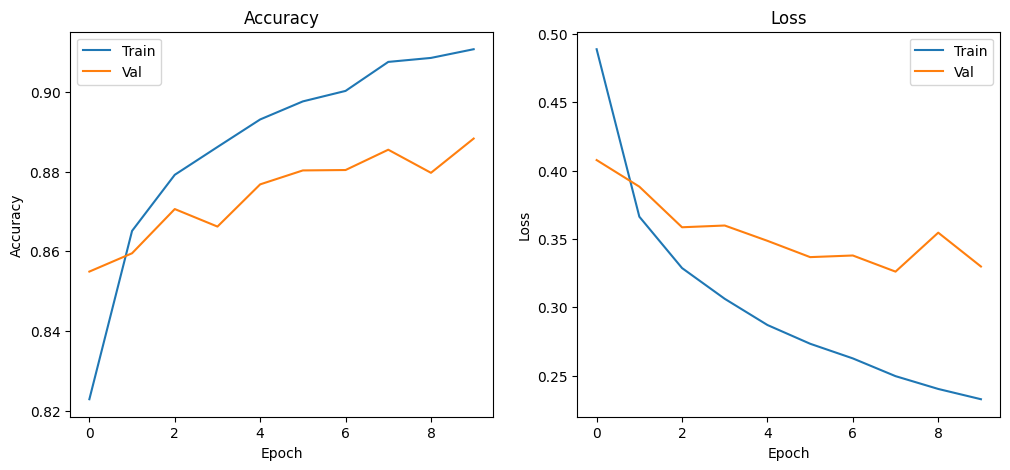

In [1]:
# ---------------------------------------------------------
# ASSIGNMENT 2: Build and Train a Feedforward Neural Network
#
# • Use PyTorch or TensorFlow to build an MLP.
# • Train on MNIST or Fashion-MNIST dataset.
# • Tune hidden layers and activation functions.
# • Report accuracy and loss curves.
# ---------------------------------------------------------

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# LOAD FASHION-MNIST DATA
# -----------------------------
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten images (28x28 → 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# -----------------------------
# BUILD MLP MODEL
# -----------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# -----------------------------
# COMPILE MODEL
# -----------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# TRAIN MODEL
# -----------------------------
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1
)

# -----------------------------
# EVALUATE MODEL
# -----------------------------
loss, acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", acc)
print("Test Loss:", loss)

# -----------------------------
# PLOT ACCURACY & LOSS CURVES
# -----------------------------
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()
